在这个代码中，我们首先读取了表格A和表格B。然后，我们遍历表格A中的关键词，针对每个关键词在表格B中查找匹配的记录。对于每个关键词，我们选择"Patent #"对应publication year最小的记录以及"PRLI"最大的记录，并将它们合并成一个记录。最后，我们将结果存储在一个新的DataFrame中，其中包含了关键词、"Patent #"和"PRLI"字段。如果没有匹配的记录，对应的字段将设置为NaN。

您可以根据需要将结果保存到文件或进行其他处理。如果有任何进一步的问题或需要进一步的帮助，请随时告诉我。

In [14]:
import pandas as pd

# 读取表格A和表格B
df_a = pd.read_excel("keyword_timeline_results.xlsx", sheet_name="Sheet1")
df_b = pd.read_excel("dictionary 1-robot.xlsx",  sheet_name="Sheet2")

# 创建一个字典来存储结果
result_dict = {'keyword': [], 'Patent #': [], 'PRLI': []}

# 遍历表格A中的关键词
for keyword in df_a['keyword']:
    # 在表格B中查找匹配的关键词
    matches = df_b[df_b['keyword from n-gram'].str.contains(keyword, case=False)]
    
    if not matches.empty:
        # 选择PRLI最大的记录
        max_prl_row = matches[matches['PRLI'] == matches['PRLI'].max()]
        
        # 提取相关信息
        result_dict['keyword'].append(keyword)
        result_dict['Patent #'].append(max_prl_row['Patent #'].values[0])
        result_dict['PRLI'].append(max_prl_row['PRLI'].values[0])
    else:
        # 如果没有匹配的记录，将对应的字段设置为NaN
        result_dict['keyword'].append(keyword)
        result_dict['Patent #'].append(None)
        result_dict['PRLI'].append(None)

# 创建结果DataFrame
result_df = pd.DataFrame(result_dict)

# 将表格A的"x-value"和"y-value"列合并到结果中
result_df = pd.concat([df_a, result_df[['Patent #', 'PRLI']]], axis=1)

# 打印结果
print(result_df)
# 将结果导出为Excel文件
result_df.to_excel("result_df_table_robot.xlsx", index=False)


                                keyword  x-value  y-value         Patent #  \
0        lightweight_construction_robot     1984       42  US20210229296A1   
1               wall_construction_robot     1995       60     CN102383585A   
2                  brick_building_robot     2007       73     CN107357294A   
3      building_wall_construction_robot     2012       90     CN102383585A   
4                   building_wall_robot     2012       96     CN115788086A   
5                   wall_building_robot     2014      114     CN107246155A   
6                  robot_control_system     2014      124     CN105467858A   
7                 articulated_arm_robot     2015      135  US20210229296A1   
8                 crawler_moving_device     2015      140     CN108945124A   
9                  robotic_arm_assembly     2016      152  US20190366536A1   
10               building_robot_control     2016      158     CN113021330A   
11                    folding_arm_robot     2017      176  US202

c:\softwares\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


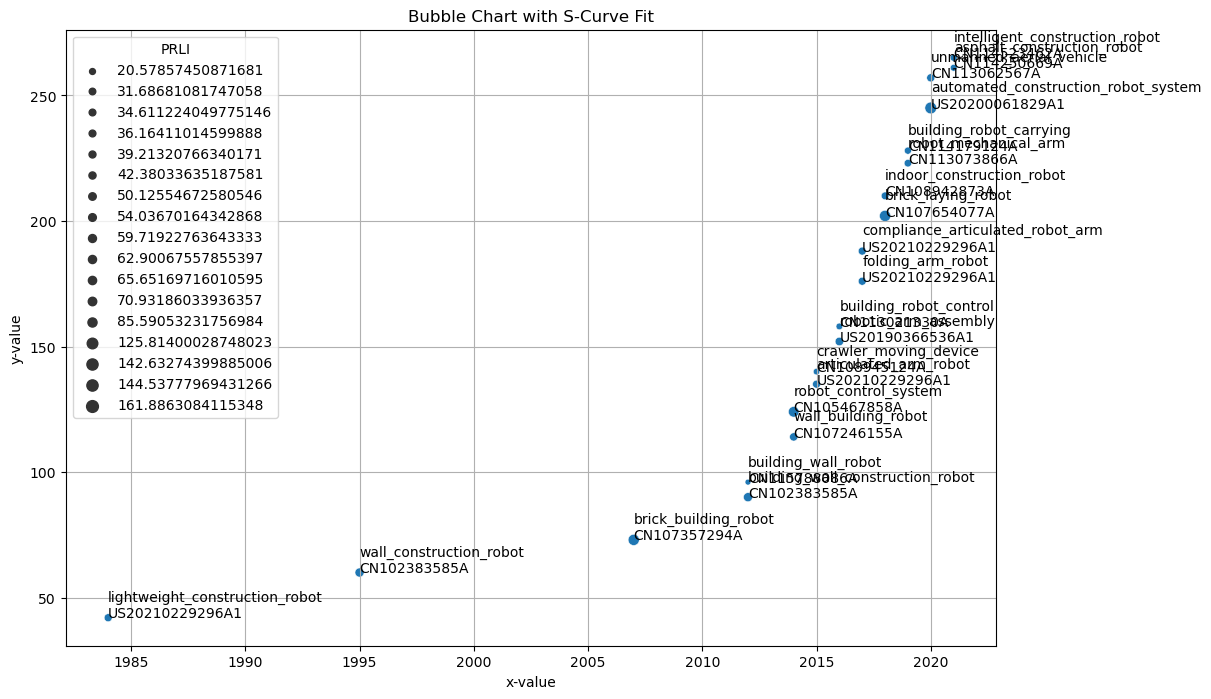

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# 读取表格A和表格B
df_a = pd.read_excel("keyword_timeline_results.xlsx", sheet_name="Sheet1")
df_b = pd.read_excel("dictionary 1-robot.xlsx",  sheet_name="Sheet2")

# 创建一个字典来存储结果
result_dict = {'keyword': [], 'Patent #': [], 'PRLI': []}

# 遍历表格A中的关键词
for keyword in df_a['keyword']:
    # 在表格B中查找匹配的关键词
    matches = df_b[df_b['keyword from n-gram'].str.contains(keyword, case=False)]
    
    if not matches.empty:
        # 选择PRLI最大的记录
        max_prl_row = matches[matches['PRLI'] == matches['PRLI'].max()]
        
        # 提取相关信息
        result_dict['keyword'].append(keyword)
        result_dict['Patent #'].append(max_prl_row['Patent #'].values[0])
        result_dict['PRLI'].append(max_prl_row['PRLI'].values[0])
    else:
        # 如果没有匹配的记录，将对应的字段设置为NaN
        result_dict['keyword'].append(keyword)
        result_dict['Patent #'].append(None)
        result_dict['PRLI'].append(None)

# 创建结果DataFrame
result_df = pd.DataFrame(result_dict)

# 将表格A的"x-value"和"y-value"列合并到结果中
result_df = pd.concat([df_a, result_df[['Patent #', 'PRLI']]], axis=1)

# 生成气泡图
plt.figure(figsize=(12, 8))
sns.scatterplot(x='x-value', y='y-value', size='PRLI', data=result_df, legend='full')

# 添加标签
for i, row in result_df.iterrows():
    plt.text(row['x-value'], row['y-value'], f"{row['keyword']}\n{row['Patent #']}")

# 非线性回归
def s_curve(x, a, b, c, d):
    return a / (1 + np.exp(-c * (x - d))) + b

x_data = result_df['x-value']
y_data = result_df['y-value']

params, params_covariance = curve_fit(s_curve, x_data, y_data)

# # 绘制回归曲线
# x_curve = np.linspace(min(x_data), max(x_data), 100)
# y_curve = s_curve(x_curve, params[0], params[1], params[2], params[3])
# plt.plot(x_curve, y_curve, label=f'S-Curve Fit (R-square={round(params[2], 2)})', color='red')

# # 添加图例
# plt.legend()

# 显示图形
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.title('Bubble Chart with S-Curve Fit')
plt.grid(True)
plt.show()


In [3]:
import pandas as pd

# 读取表格A和表格B
df_a = pd.read_excel("keyword_timeline_results_non-robot.xlsx", sheet_name="Sheet1")
df_b = pd.read_excel("dictionary 2non-robot.xlsx",  sheet_name="sheet2")

# 创建一个字典来存储结果
result_dict = {'keyword': [], 'Patent #': [], 'PRLI': []}

# 遍历表格A中的关键词
for keyword in df_a['keyword']:
    # 在表格B中查找匹配的关键词
    matches = df_b[df_b['keyword from n-gram'].str.contains(keyword, case=False)]
    
    if not matches.empty:
        # 选择PRLI最大的记录
        max_prl_row = matches[matches['PRLI'] == matches['PRLI'].max()]
        
        # 提取相关信息
        result_dict['keyword'].append(keyword)
        result_dict['Patent #'].append(max_prl_row['Patent #'].values[0])
        result_dict['PRLI'].append(max_prl_row['PRLI'].values[0])
    else:
        # 如果没有匹配的记录，将对应的字段设置为NaN
        result_dict['keyword'].append(keyword)
        result_dict['Patent #'].append(None)
        result_dict['PRLI'].append(None)

# 创建结果DataFrame
result_df = pd.DataFrame(result_dict)

# 将表格A的"x-value"和"y-value"列合并到结果中
result_df = pd.concat([df_a, result_df[['Patent #', 'PRLI']]], axis=1)

# 打印结果
print(result_df)
# 将结果导出为Excel文件
result_df.to_excel("result_df_table_non-robot.xlsx", index=False)


                             keyword  x-value  y-value         Patent #  \
0          construction_robot_system     1999       30  US20200061829A1   
1    optoelectronic_hybrid_apparatus     2004       35   WO2004079420A1   
2            image_processing_device     2009       42      EP2189944A1   
3            automatic_search_system     2011       46  US20110046838A1   
4                  electric_push_rod     2014       65     CN114753662A   
5          building_block_connecting     2014       70     CN217041307U   
6               image_capturing_unit     2015       77  US20150054918A1   
7           camera_coordinate_system     2015       83     CN108312144A   
8        industrial_control_computer     2016       91     CN113684877A   
9                   main_control_box     2016       99     CN107224735A   
10                 gripper_base_body     2017      113  US20210229296A1   
11         articulation_device_forms     2017      124  US20180207811A1   
12      robot_base_coordi

c:\softwares\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


c:\softwares\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
c:\softwares\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


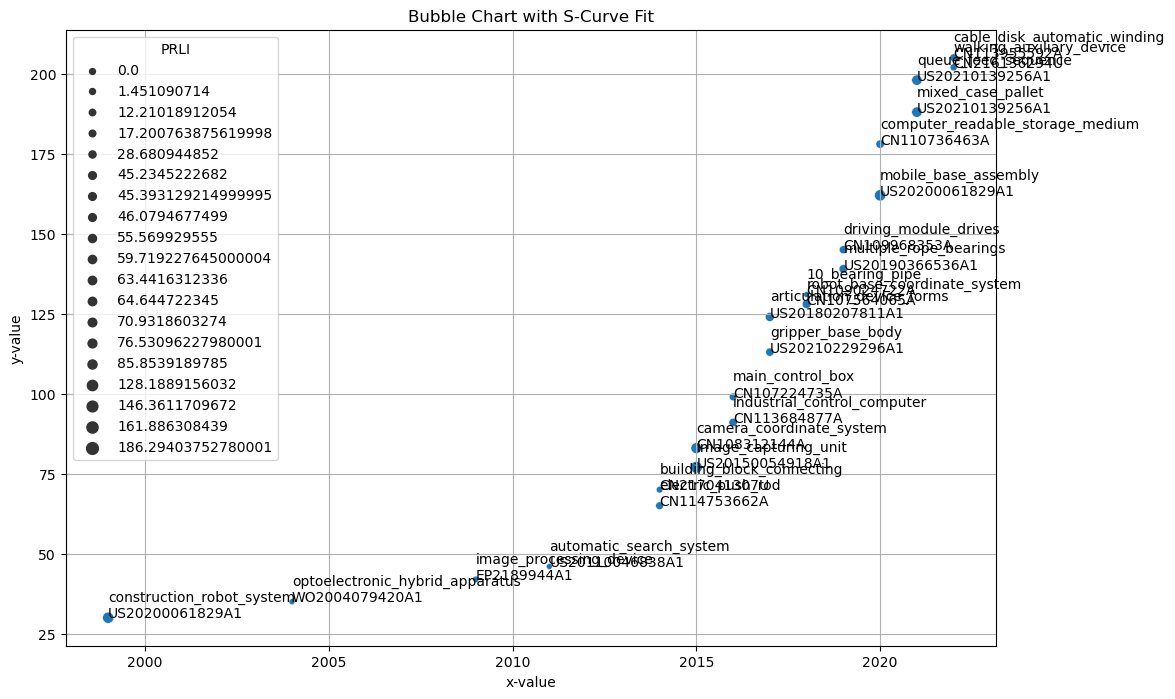

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# 读取表格A和表格B
df_a = pd.read_excel("keyword_timeline_results_non-robot.xlsx", sheet_name="Sheet1")
df_b = pd.read_excel("dictionary 2non-robot.xlsx",  sheet_name="sheet2")


# 创建一个字典来存储结果
result_dict = {'keyword': [], 'Patent #': [], 'PRLI': []}

# 遍历表格A中的关键词
for keyword in df_a['keyword']:
    # 在表格B中查找匹配的关键词
    matches = df_b[df_b['keyword from n-gram'].str.contains(keyword, case=False)]
    
    if not matches.empty:
        # 选择PRLI最大的记录
        max_prl_row = matches[matches['PRLI'] == matches['PRLI'].max()]
        
        # 提取相关信息
        result_dict['keyword'].append(keyword)
        result_dict['Patent #'].append(max_prl_row['Patent #'].values[0])
        result_dict['PRLI'].append(max_prl_row['PRLI'].values[0])
    else:
        # 如果没有匹配的记录，将对应的字段设置为NaN
        result_dict['keyword'].append(keyword)
        result_dict['Patent #'].append(None)
        result_dict['PRLI'].append(None)

# 创建结果DataFrame
result_df = pd.DataFrame(result_dict)

# 将表格A的"x-value"和"y-value"列合并到结果中
result_df = pd.concat([df_a, result_df[['Patent #', 'PRLI']]], axis=1)

# 生成气泡图
plt.figure(figsize=(12, 8))
sns.scatterplot(x='x-value', y='y-value', size='PRLI', data=result_df, legend='full')

# 添加标签
for i, row in result_df.iterrows():
    plt.text(row['x-value'], row['y-value'], f"{row['keyword']}\n{row['Patent #']}")

# 非线性回归
def s_curve(x, a, b, c, d):
    return a / (1 + np.exp(-c * (x - d))) + b

x_data = result_df['x-value']
y_data = result_df['y-value']

params, params_covariance = curve_fit(s_curve, x_data, y_data)

# # 绘制回归曲线
# x_curve = np.linspace(min(x_data), max(x_data), 100)
# y_curve = s_curve(x_curve, params[0], params[1], params[2], params[3])
# plt.plot(x_curve, y_curve, label=f'S-Curve Fit (R-square={round(params[2], 2)})', color='red')

# # 添加图例
# plt.legend()

# 显示图形
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.title('Bubble Chart with S-Curve Fit')
plt.grid(True)
plt.show()
